<a href="https://colab.research.google.com/github/2303A52328/Explainable_AI/blob/main/Exp_ai_ass_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd

In [7]:
data = pd.read_csv("/content/kidney_disease_dataset.csv")
data.head()

,Age of the patient,Blood pressure (mm/Hg),Specific gravity of urine,Albumin in urine,Sugar in urine,Red blood cells in urine,Pus cells in urine,Pus cell clumps in urine,Bacteria in urine,Random blood glucose level (mg/dl),...,Smoking status,Body Mass Index (BMI),Physical activity level,Duration of diabetes mellitus (years),Duration of hypertension (years),Cystatin C level,Urinary sediment microscopy results,C-reactive protein (CRP) level,Interleukin-6 (IL-6) level,Target
0,54,167,1.023,1,4,normal,abnormal,not present,not present,96,...,yes,25.3,low,4.0,16.0,0.67,normal,4.88,10.23,No_Disease
1,42,127,1.023,3,2,normal,normal,not present,present,73,...,no,20.6,moderate,3.0,13.0,0.55,abnormal,4.49,13.11,Low_Risk
2,38,148,1.016,0,0,abnormal,normal,not present,not present,77,...,no,38.4,high,11.0,23.0,2.37,abnormal,4.57,13.27,No_Disease
3,7,98,1.017,4,0,abnormal,normal,not present,present,225,...,no,24.7,high,24.0,3.0,2.54,abnormal,8.57,12.36,No_Disease
4,67,174,1.015,1,1,normal,abnormal,not present,not present,376,...,yes,17.6,high,22.0,24.0,1.90,normal,6.75,1.46,No_Disease


In [8]:
data.columns

Index(['Age of the patient', 'Blood pressure (mm/Hg)',
       'Specific gravity of urine', 'Albumin in urine', 'Sugar in urine',
       'Red blood cells in urine', 'Pus cells in urine',
       'Pus cell clumps in urine', 'Bacteria in urine',
       'Random blood glucose level (mg/dl)', 'Blood urea (mg/dl)',
       'Serum creatinine (mg/dl)', 'Sodium level (mEq/L)',
       'Potassium level (mEq/L)', 'Hemoglobin level (gms)',
       'Packed cell volume (%)', 'White blood cell count (cells/cumm)',
       'Red blood cell count (millions/cumm)', 'Hypertension (yes/no)',
       'Diabetes mellitus (yes/no)', 'Coronary artery disease (yes/no)',
       'Appetite (good/poor)', 'Pedal edema (yes/no)', 'Anemia (yes/no)',
       'Estimated Glomerular Filtration Rate (eGFR)',
       'Urine protein-to-creatinine ratio', 'Urine output (ml/day)',
       'Serum albumin level', 'Cholesterol level',
       'Parathyroid hormone (PTH) level', 'Serum calcium level',
       'Serum phosphate level', 'Family hi

In [9]:
data['Target'].unique()

array(['No_Disease', 'Low_Risk', 'Moderate_Risk', 'Severe_Disease',
       'High_Risk', nan], dtype=object)

In [10]:
data[data.select_dtypes(include='object').columns] = data.select_dtypes(include='object').apply(lambda x: x.str.strip())

In [11]:

# Inspect shape
print("Shape:", data.shape)

Shape: (7852, 43)


In [12]:
# Inspect datatypes
print("\nData types:\n", data.dtypes)


Data types:
 Age of the patient                               int64
Blood pressure (mm/Hg)                           int64
Specific gravity of urine                      float64
Albumin in urine                                 int64
Sugar in urine                                   int64
Red blood cells in urine                        object
Pus cells in urine                              object
Pus cell clumps in urine                        object
Bacteria in urine                               object
Random blood glucose level (mg/dl)               int64
Blood urea (mg/dl)                             float64
Serum creatinine (mg/dl)                       float64
Sodium level (mEq/L)                           float64
Potassium level (mEq/L)                        float64
Hemoglobin level (gms)                         float64
Packed cell volume (%)                           int64
White blood cell count (cells/cumm)              int64
Red blood cell count (millions/cumm)           floa

In [13]:
# Check missing values
print("\nMissing values:\n", data.isnull().sum())


Missing values:
 Age of the patient                             0
Blood pressure (mm/Hg)                         0
Specific gravity of urine                      0
Albumin in urine                               0
Sugar in urine                                 0
Red blood cells in urine                       0
Pus cells in urine                             0
Pus cell clumps in urine                       0
Bacteria in urine                              0
Random blood glucose level (mg/dl)             0
Blood urea (mg/dl)                             0
Serum creatinine (mg/dl)                       0
Sodium level (mEq/L)                           0
Potassium level (mEq/L)                        0
Hemoglobin level (gms)                         0
Packed cell volume (%)                         0
White blood cell count (cells/cumm)            0
Red blood cell count (millions/cumm)           0
Hypertension (yes/no)                          0
Diabetes mellitus (yes/no)                     0
Co

In [14]:
from sklearn.impute import SimpleImputer

# Drop columns with >30% missing values
threshold = 0.3 * len(data)
data = data.drop(columns=[col for col in data.columns if data[col].isnull().sum() > threshold])

# Separate numeric and categorical columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
cat_cols = data.select_dtypes(include=['object']).columns

# Impute numeric with median, categorical with mode
num_imputer = SimpleImputer(strategy='median')
cat_imputer = SimpleImputer(strategy='most_frequent')

data[num_cols] = num_imputer.fit_transform(data[num_cols])
data[cat_cols] = cat_imputer.fit_transform(data[cat_cols])

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
# 1. Summary statistics
print(data.describe(include='all'))

        Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
count          7852.000000             7852.000000                7852.000000   
unique                 NaN                     NaN                        NaN   
top                    NaN                     NaN                        NaN   
freq                   NaN                     NaN                        NaN   
mean             47.646332              130.012990                   1.015079   
std              24.914719               29.128694                   0.005784   
min               5.000000               80.000000                   1.005000   
25%              26.000000              105.000000                   1.010000   
50%              47.000000              130.000000                   1.015000   
75%              69.000000              155.000000                   1.020000   
max              90.000000              180.000000                   1.025000   

        Albumin in urine  S

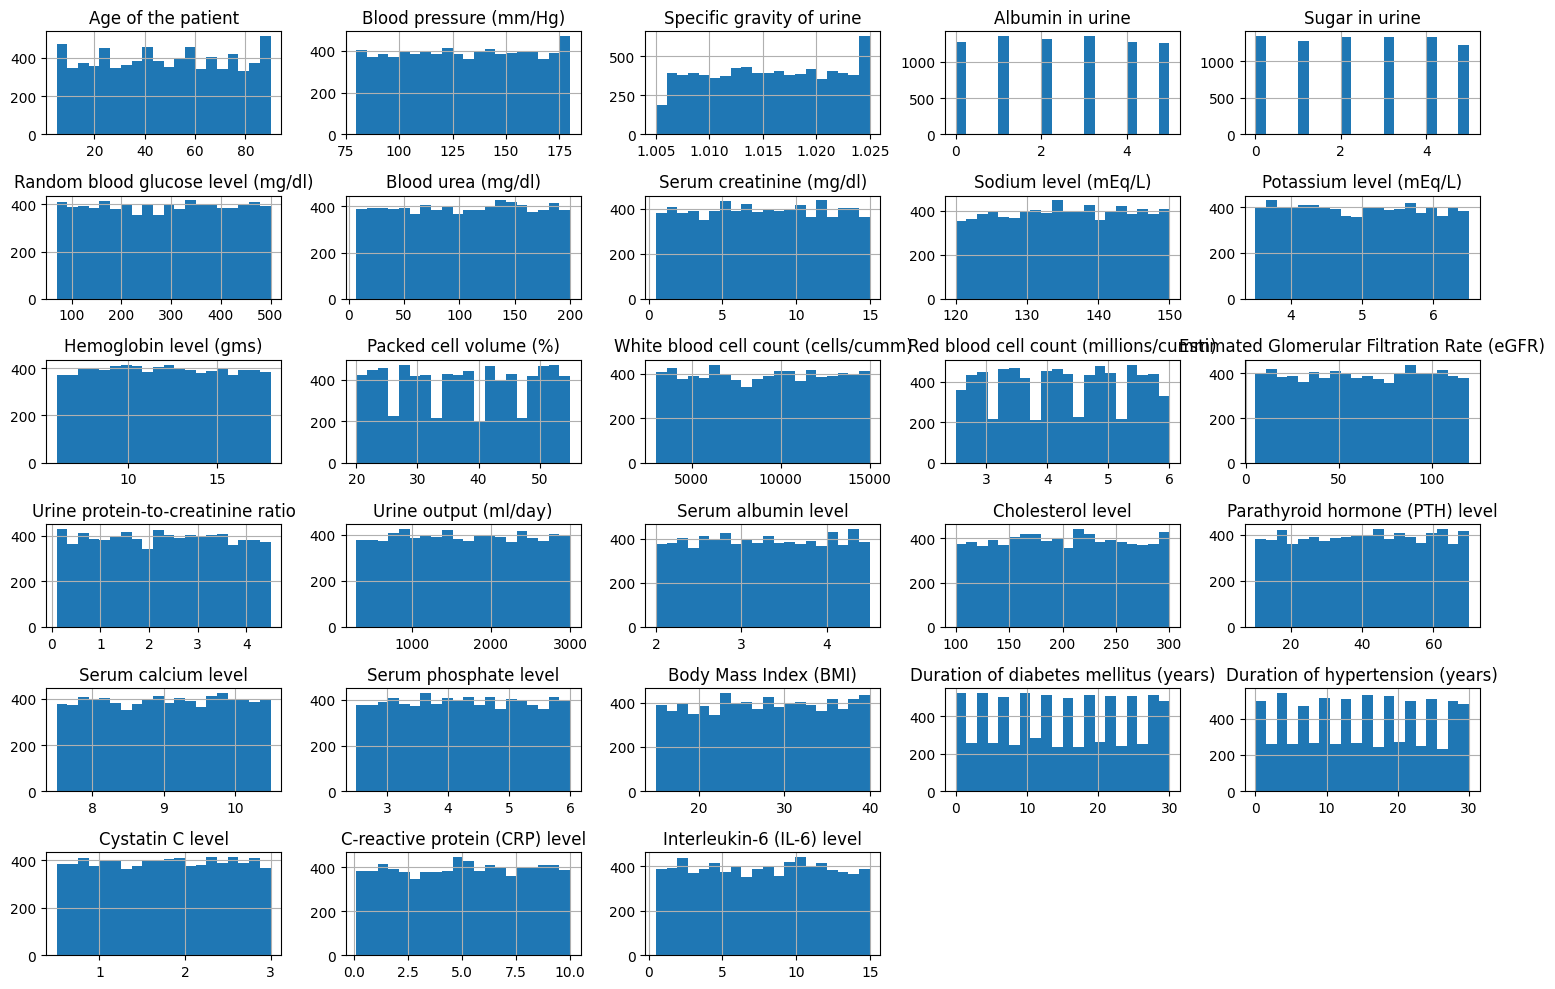

In [17]:
# 2. Distribution plots for numeric columns
num_cols = data.select_dtypes(include=['float64', 'int64']).columns
data[num_cols].hist(figsize=(15,10), bins=20)
plt.tight_layout()
plt.show()

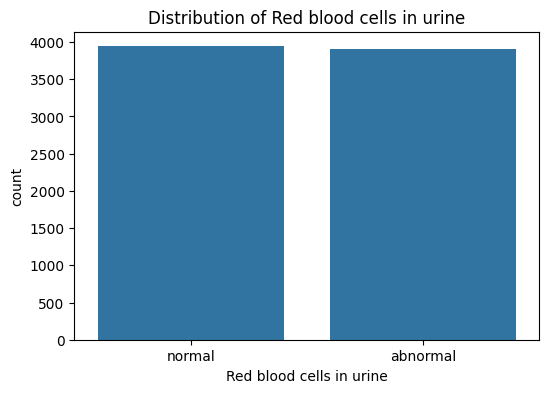

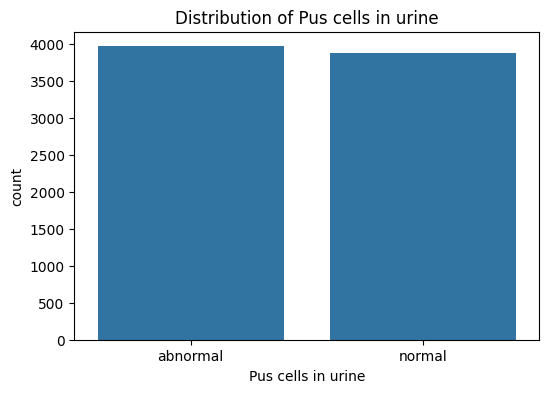

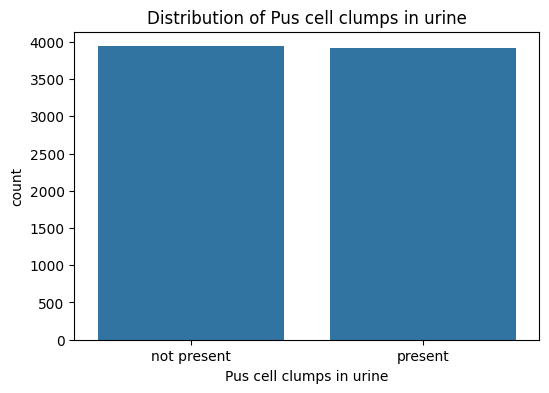

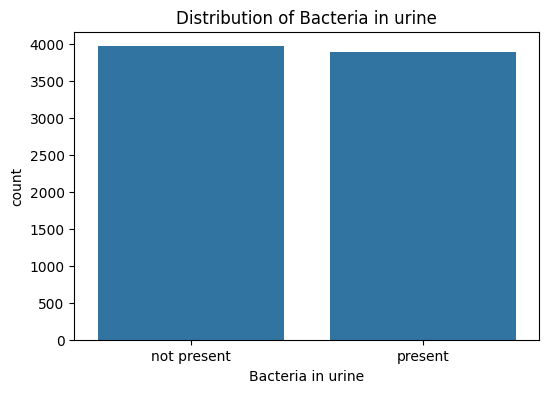

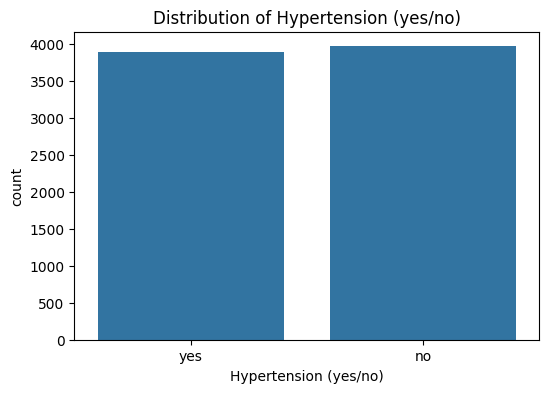

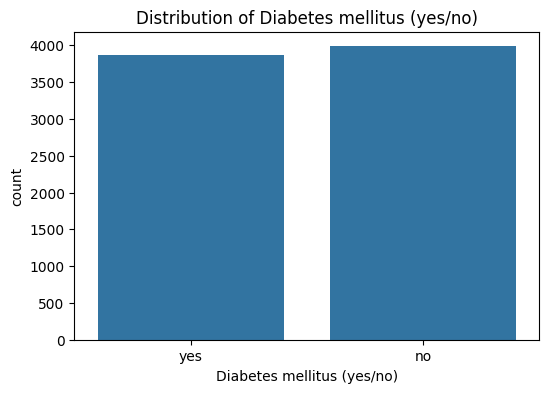

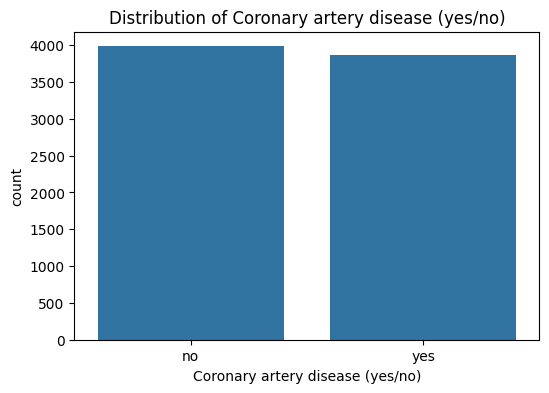

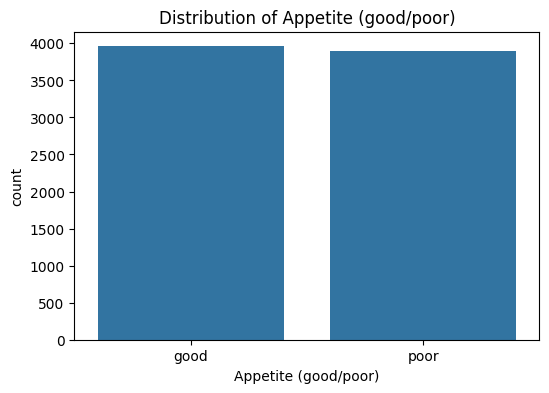

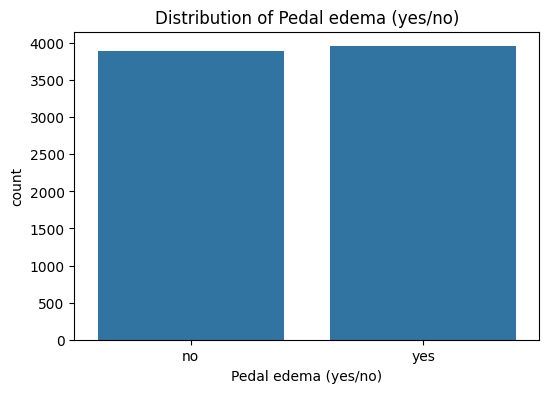

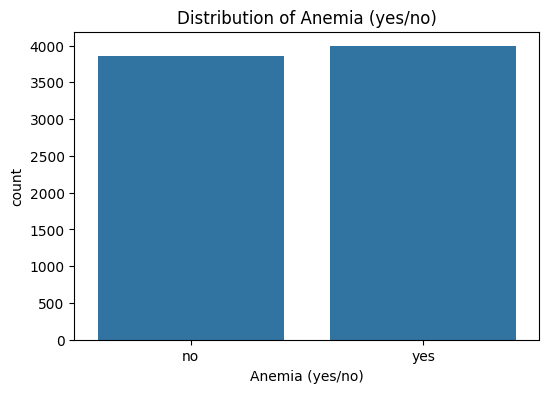

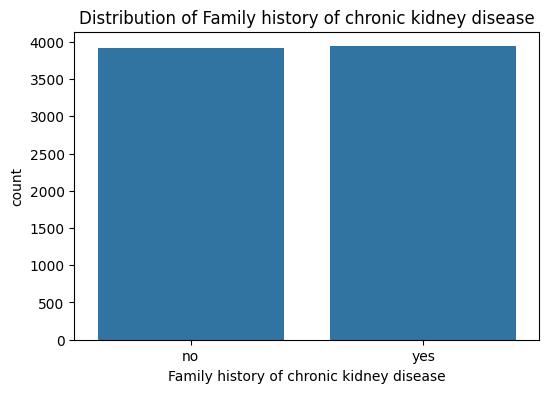

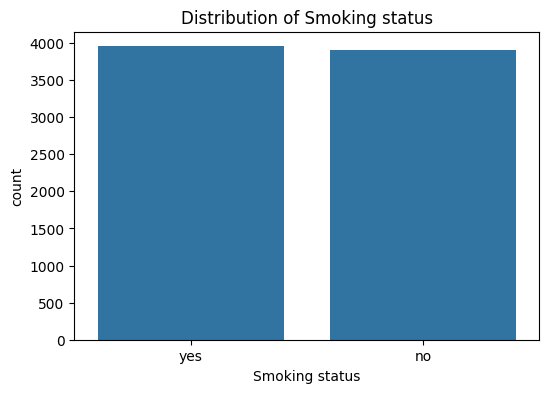

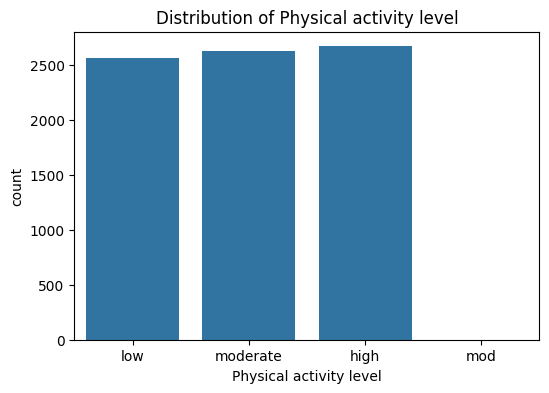

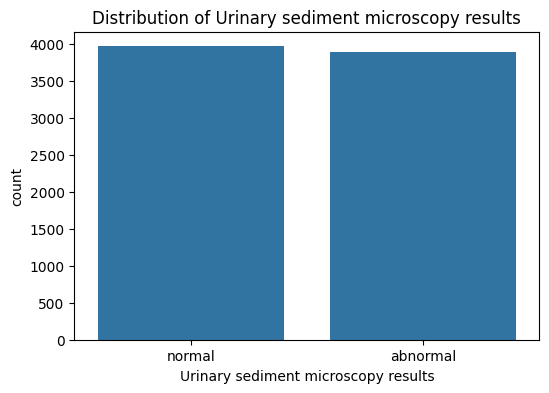

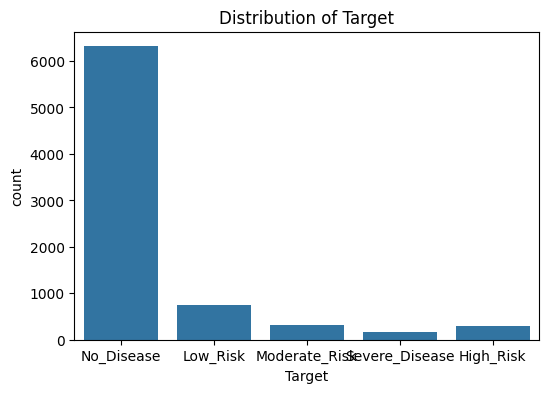

In [18]:
# 3. Count plots for categorical columns
cat_cols = data.select_dtypes(include=['object']).columns
for col in cat_cols:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, data=data)
    plt.title(f'Distribution of {col}')
    plt.show()

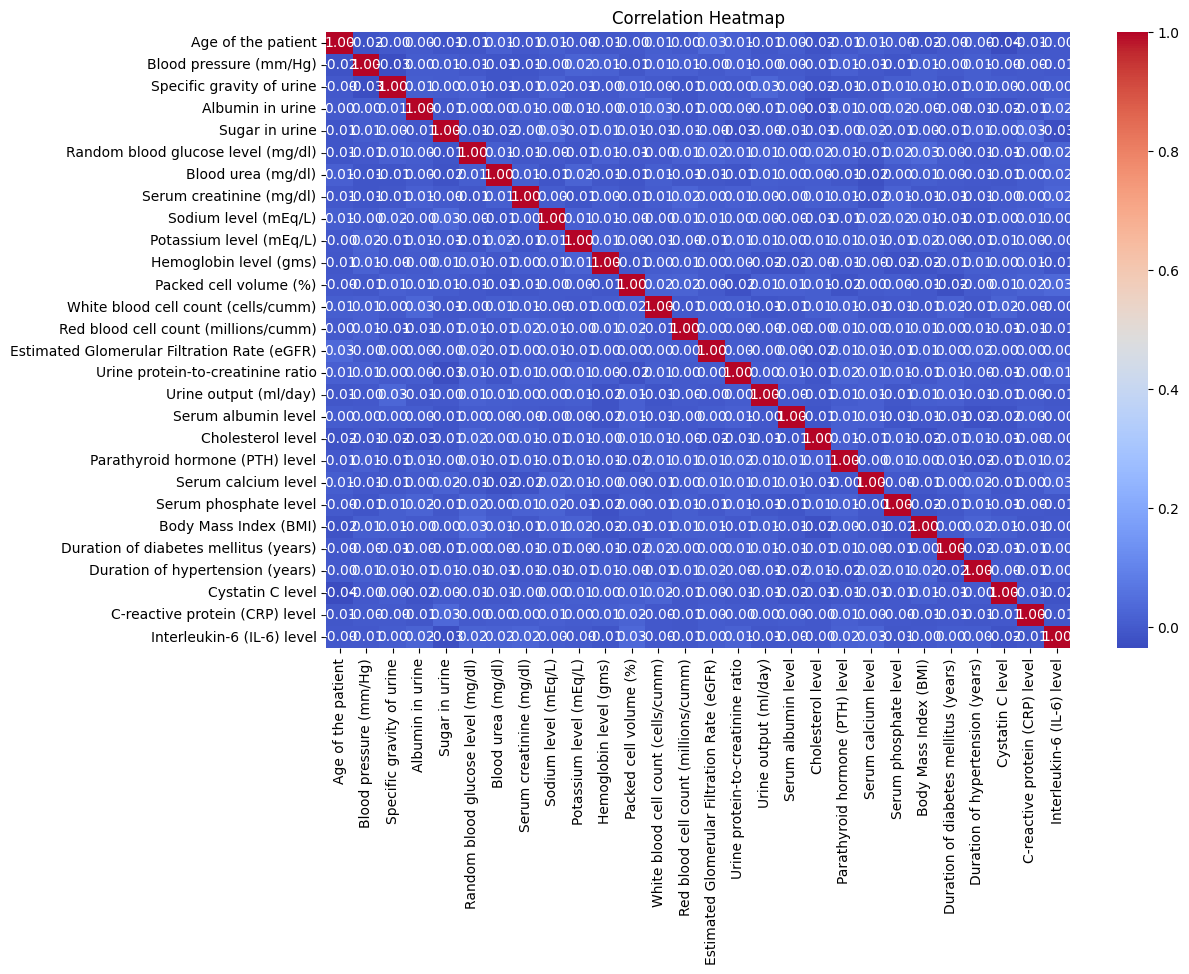

In [19]:
# 4. Correlation heatmap for numeric columns
plt.figure(figsize=(12,8))
sns.heatmap(data[num_cols].corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

Target
No_Disease        6318
Low_Risk           754
Moderate_Risk      306
High_Risk          303
Severe_Disease     171
Name: count, dtype: int64


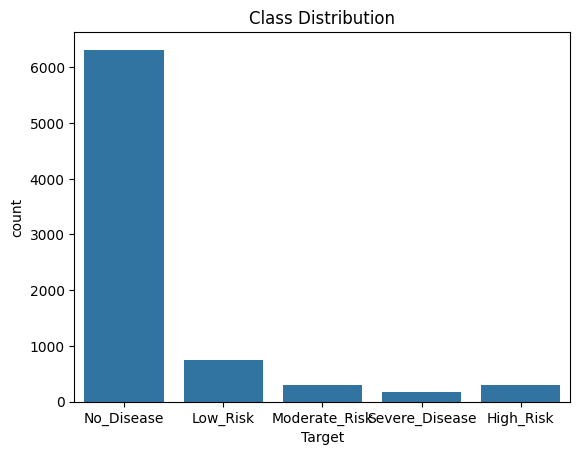

In [20]:
# Count of each class
print(data['Target'].value_counts())

# Visualize
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(x='Target', data=data)
plt.title("Class Distribution")
plt.show()

In [21]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline # Changed import here

X = data.drop('Target', axis=1)
y = data['Target']

# Identify categorical and numerical columns
cat_cols = X.select_dtypes(include=['object']).columns
num_cols = X.select_dtypes(include=['float64', 'int64']).columns

# Create a column transformer to apply one-hot encoding to categorical columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', num_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), cat_cols)
    ])

# Create a pipeline with the preprocessor and SMOTE
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('smote', SMOTE(random_state=42))])

# Apply the pipeline to the data
X_res, y_res = pipeline.fit_resample(X, y)

# Verify new distribution
print(y_res.value_counts())

Target
No_Disease        6318
Low_Risk          6318
Moderate_Risk     6318
Severe_Disease    6318
High_Risk         6318
Name: count, dtype: int64


In [22]:
from sklearn.preprocessing import LabelEncoder

cat_cols = data.select_dtypes(include=['object']).columns.drop('Target')
le = LabelEncoder()
for col in cat_cols:
    data[col] = le.fit_transform(data[col])

data['Target'] = data['Target'].map({'No_Disease': 0, 'Low_Risk': 1, 'Moderate_Risk': 2, 'High_Risk': 3, 'Severe_Disease': 4})
print(data.head())

   Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0                54.0                   167.0                      1.023   
1                42.0                   127.0                      1.023   
2                38.0                   148.0                      1.016   
3                 7.0                    98.0                      1.017   
4                67.0                   174.0                      1.015   

   Albumin in urine  Sugar in urine  Red blood cells in urine  \
0               1.0             4.0                         1   
1               3.0             2.0                         1   
2               0.0             0.0                         0   
3               4.0             0.0                         0   
4               1.0             1.0                         1   

   Pus cells in urine  Pus cell clumps in urine  Bacteria in urine  \
0                   0                         0                  0   
1           

In [ ]:
from sklearn.preprocessing import StandardScaler

num_cols = data.select_dtypes(include=['float64', 'int64']).columns.drop('Target')
scaler = StandardScaler()
data[num_cols] = scaler.fit_transform(data[num_cols])

print(data.head())

   Age of the patient  Blood pressure (mm/Hg)  Specific gravity of urine  \
0            0.261498                1.260976                   1.374088   
1           -0.219631               -0.115338                   1.374088   
2           -0.380007                0.607227                   0.165634   
3           -1.622924               -1.113166                   0.338270   
4            0.782721                1.501831                  -0.007002   

   Albumin in urine  Sugar in urine  Red blood cells in urine  \
0         -0.884637        0.885002                  0.999708   
1          0.293884       -0.290764                  0.999708   
2         -1.473897       -1.466531                 -1.000292   
3          0.883145       -1.466531                 -1.000292   
4         -0.884637       -0.878648                  0.999708   

   Pus cells in urine  Pus cell clumps in urine  Bacteria in urine  \
0           -0.999513                 -1.002828          -0.991853   
1           

In [23]:
print(data.isnull().sum())

Age of the patient                             0
Blood pressure (mm/Hg)                         0
Specific gravity of urine                      0
Albumin in urine                               0
Sugar in urine                                 0
Red blood cells in urine                       0
Pus cells in urine                             0
Pus cell clumps in urine                       0
Bacteria in urine                              0
Random blood glucose level (mg/dl)             0
Blood urea (mg/dl)                             0
Serum creatinine (mg/dl)                       0
Sodium level (mEq/L)                           0
Potassium level (mEq/L)                        0
Hemoglobin level (gms)                         0
Packed cell volume (%)                         0
White blood cell count (cells/cumm)            0
Red blood cell count (millions/cumm)           0
Hypertension (yes/no)                          0
Diabetes mellitus (yes/no)                     0
Coronary artery dise

In [24]:
from sklearn.model_selection import train_test_split

X = data.drop('Target', axis=1)
y = data['Target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (6281, 42) (6281,)
Testing set: (1571, 42) (1571,)


In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

models = {
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(probability=True),
    "KNN": KNeighborsClassifier(),
    "Gradient Boosting": GradientBoostingClassifier()
}

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_proba = model.predict_proba(X_test) if hasattr(model, "predict_proba") else None # Get probabilities for all classes
    results.append({
        "Model": name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average='weighted'), # Changed average
        "Recall": recall_score(y_test, y_pred, average='weighted'),      # Changed average
        "F1": f1_score(y_test, y_pred, average='weighted'),              # Changed average
        "ROC-AUC": roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted') if y_proba is not None else "N/A" # Changed for multiclass
    })

import pandas as pd
print(pd.DataFrame(results))

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no pre

                 Model  Accuracy  Precision    Recall        F1   ROC-AUC
0  Logistic Regression  0.804583   0.647354  0.804583  0.717455  0.508054
1        Decision Tree  0.641630   0.664169  0.641630  0.652552  0.506815
2        Random Forest  0.804583   0.647354  0.804583  0.717455  0.501408
3                  SVM  0.804583   0.647354  0.804583  0.717455  0.487946
4                  KNN  0.798854   0.656017  0.798854  0.716491  0.522791
5    Gradient Boosting  0.796945   0.646558  0.796945  0.713918  0.493260


In [26]:
!pip install shap lime pdpbox --quiet

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.8/35.8 MB 24.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.9/64.9 kB 6.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 121.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 121.1/121.1 kB 11.2 MB/s eta 0:00:00


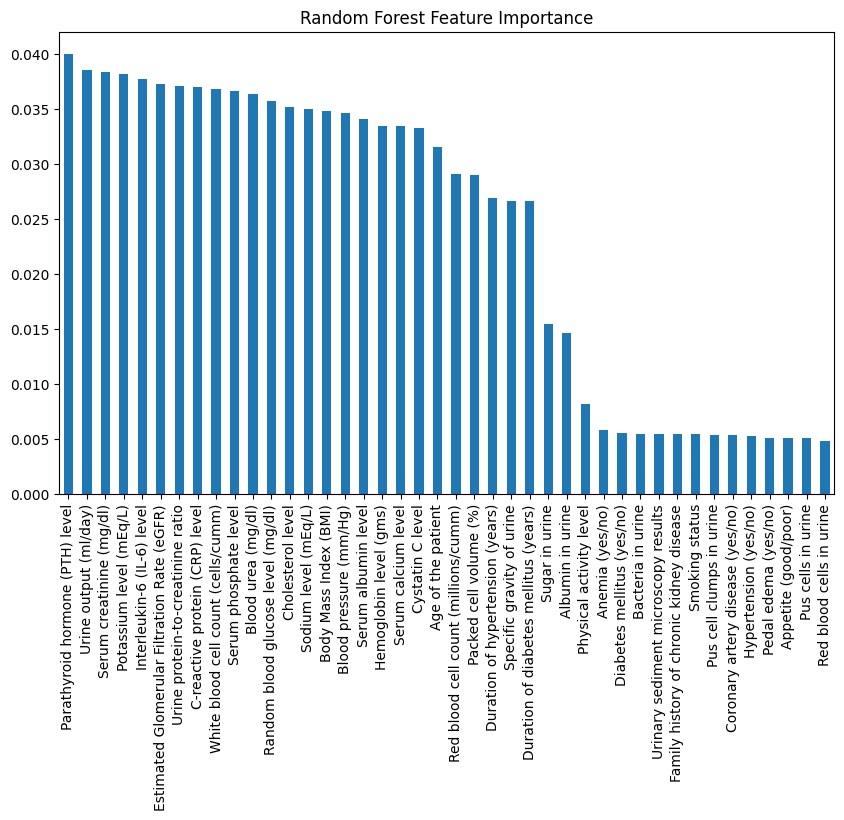

In [27]:
# Tree-based Feature Importance
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import matplotlib.pyplot as plt

rf = RandomForestClassifier()
rf.fit(X_train, y_train)
importances = pd.Series(rf.feature_importances_, index=X_train.columns).sort_values(ascending=False)
plt.figure(figsize=(10,6))
importances.plot(kind='bar')
plt.title("Random Forest Feature Importance")
plt.show()

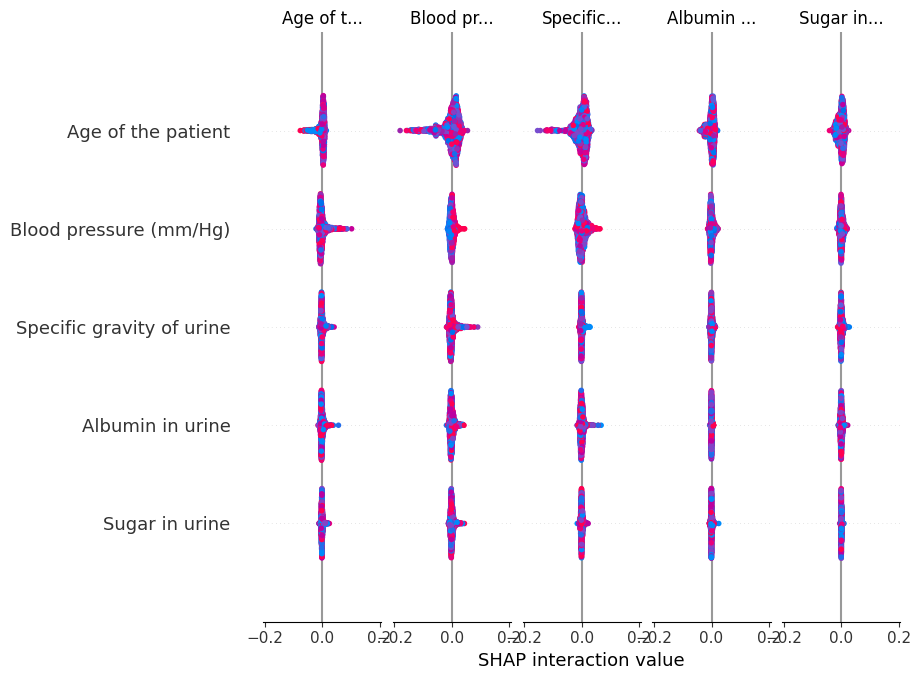

/usr/local/lib/python3.12/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


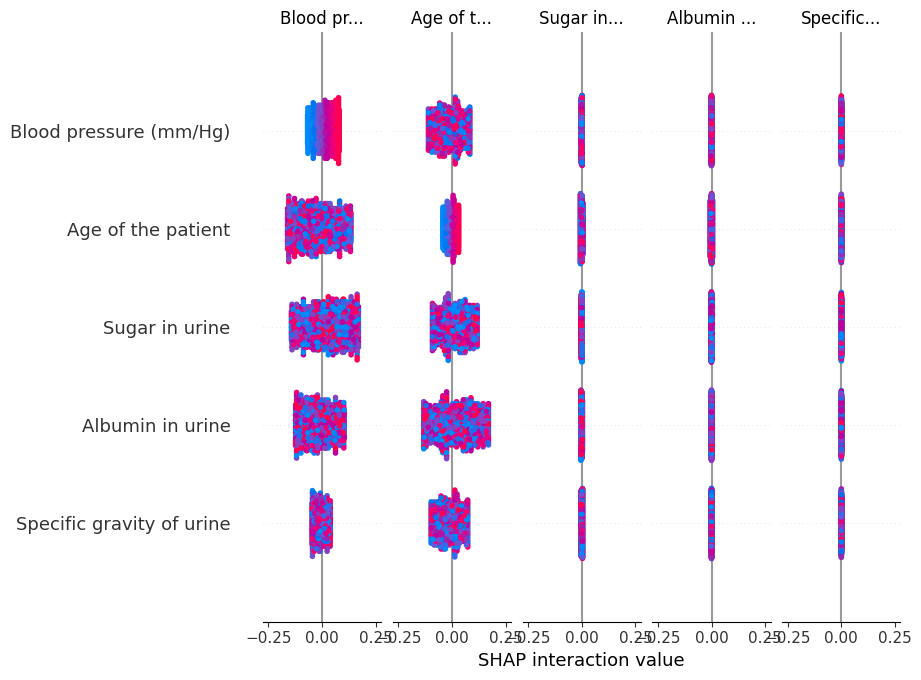

In [28]:
# SHAP values
import shap
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

# Define and fit the RandomForestClassifier model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

explainer_rf = shap.TreeExplainer(rf)
shap_values_rf = explainer_rf.shap_values(X_test)
shap.summary_plot(shap_values_rf, X_test, class_inds=1)

# Define and fit the LogisticRegression model
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

explainer_lr = shap.LinearExplainer(lr, X_train)
shap_values_lr = explainer_lr.shap_values(X_test)
shap.summary_plot(shap_values_lr, X_test)

In [30]:
from sklearn.neural_network import MLPClassifier

# Example: load or train your model
mlp = MLPClassifier(hidden_layer_sizes=(10,10), max_iter=500, random_state=42)
mlp.fit(X_train, y_train)

# LIME explanation
def mlp_predict_proba(X):
    return mlp.predict_proba(X)

explainer_lime = LimeTabularExplainer(
    X_train.values,
    feature_names=X_train.columns,
    class_names=['notckd','ckd'],
    discretize_continuous=True
)

i = 0
exp = explainer_lime.explain_instance(X_test.values[i], mlp_predict_proba, num_features=10)
exp.show_in_notebook(show_table=True)


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


In [31]:
!pip install pdp --quiet

  Preparing metadata (setup.py) ... done


In [32]:
from pdpbox import pdp, info_plots
import matplotlib.pyplot as plt

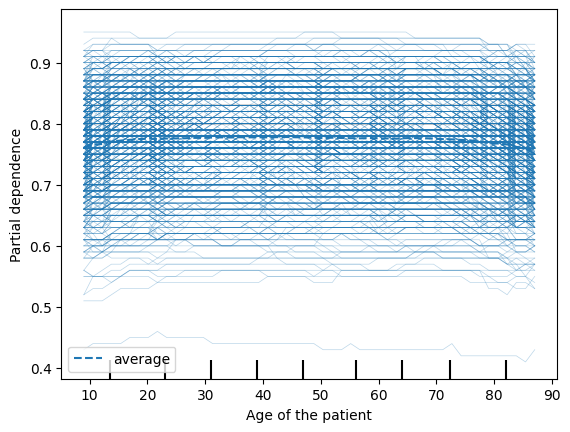

In [34]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

PartialDependenceDisplay.from_estimator(
    rf,
    X_test,
    features=['Age of the patient'],
    kind="both",
    grid_resolution=50,
    target=0 # Specify the target class for multi-class problems
)

plt.show()